In [20]:
!python3.11 -m pip install --upgrade pip
!pip3 install pandas
!pip3 install matplotlib
!pip3 install numpy

  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h1>Data Loading and Exploration</h1>	


In [26]:
df_mitbih_train = pd.read_csv("../../data/raw/heartbt_data/mitbih_train.csv", header = None)
df_mitbih_test = pd.read_csv("../../data/raw/heartbt_data/mitbih_test.csv", header = None)

In [27]:
print('shape of training set is: ', df_mitbih_train.shape)
print('shape of testing set is: ', df_mitbih_test.shape)

shape of training set is:  (87554, 188)
shape of testing set is:  (21892, 188)


In [28]:
df_mitbih_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df_mitbih_test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_mitbih_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [30]:
df_mitbih_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [6]:
df_mitbih_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [31]:
df_mitbih_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,...,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000
mean,0.894410,0.761902,0.426627,0.221596,0.201676,0.209891,0.204805,0.200992,0.197634,0.196022,...,0.004588,0.004327,0.004020,0.003789,0.003638,0.003459,0.003166,0.003000,0.002946,0.473689
std,0.234560,0.218659,0.228572,0.208711,0.177727,0.172194,0.177946,0.176142,0.170228,0.166707,...,0.043128,0.042187,0.040255,0.039397,0.038535,0.037717,0.035903,0.035522,0.035266,1.143447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.924260,0.683366,0.251197,0.050505,0.082873,0.087912,0.072663,0.065997,0.064516,0.068493,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.990431,0.828996,0.432777,0.167630,0.147642,0.158111,0.144068,0.144509,0.150422,0.149029,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.912319,0.583991,0.347092,0.259211,0.287356,0.298453,0.294563,0.289907,0.282956,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.991429,...,0.980392,1.000000,0.966102,1.000000,1.000000,1.000000,1.000000,0.996053,1.000000,4.000000


<h2>Label distribution</h2>

In [32]:
LABELS = {0:'N', 1:'S', 2:'V', 3:'F', 4:'Q'}

In [33]:
df_mitbih_train.rename(columns = {187: 'labels'}, inplace = True)
df_mitbih_train.labels = df_mitbih_train.labels.astype(int)
df_mitbih_test.rename(columns = {187: 'labels'}, inplace = True)
df_mitbih_test.labels = df_mitbih_test.labels.astype(int)

In [35]:
training_label_counts = df_mitbih_train['labels'].value_counts()
testing_label_counts = df_mitbih_test['labels'].value_counts()
print(training_label_counts, testing_label_counts)

labels
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64 labels
0    18118
4     1608
2     1448
1      556
3      162
Name: count, dtype: int64


In [10]:
[LABELS[label] for label in label_counts.index.values]

['N', 'Q', 'V', 'S', 'F']

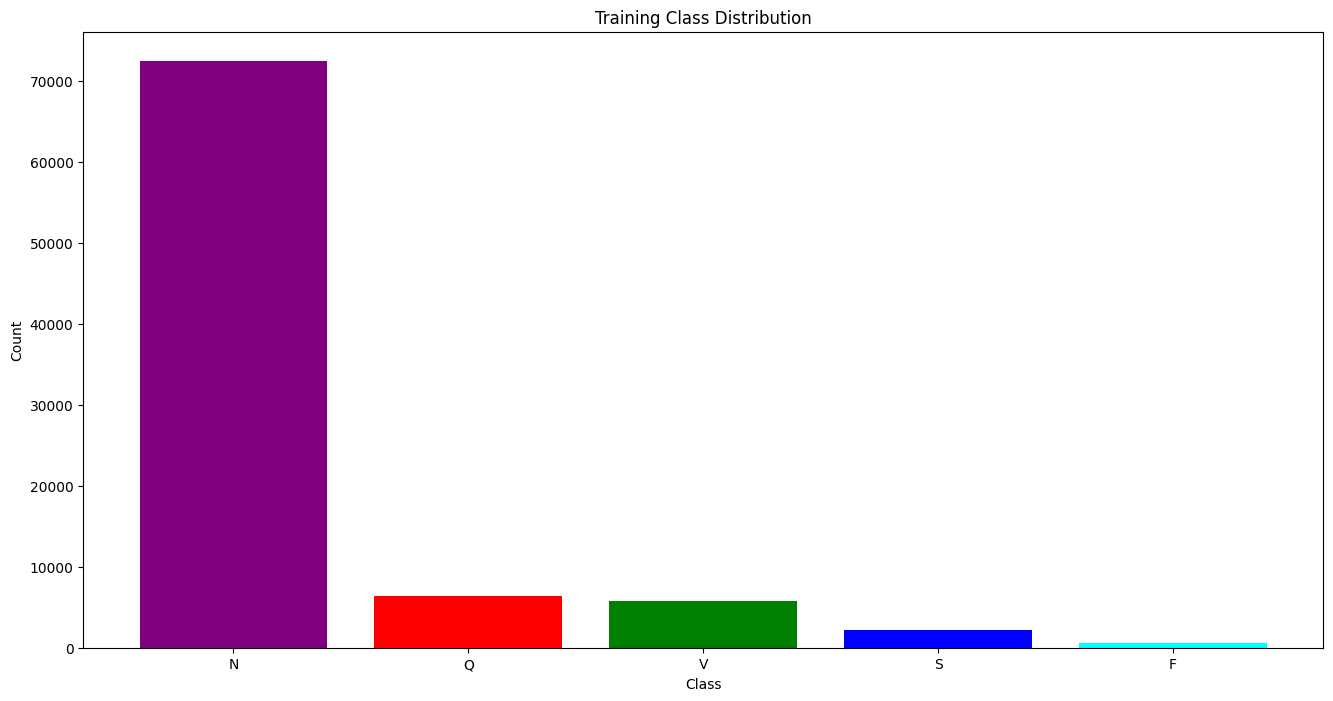

In [36]:
plt.figure(figsize=(16, 8))
plt.bar([LABELS[label] for label in training_label_counts.index.values], training_label_counts.values, 
        color=['purple', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Training Class Distribution')
plt.show()

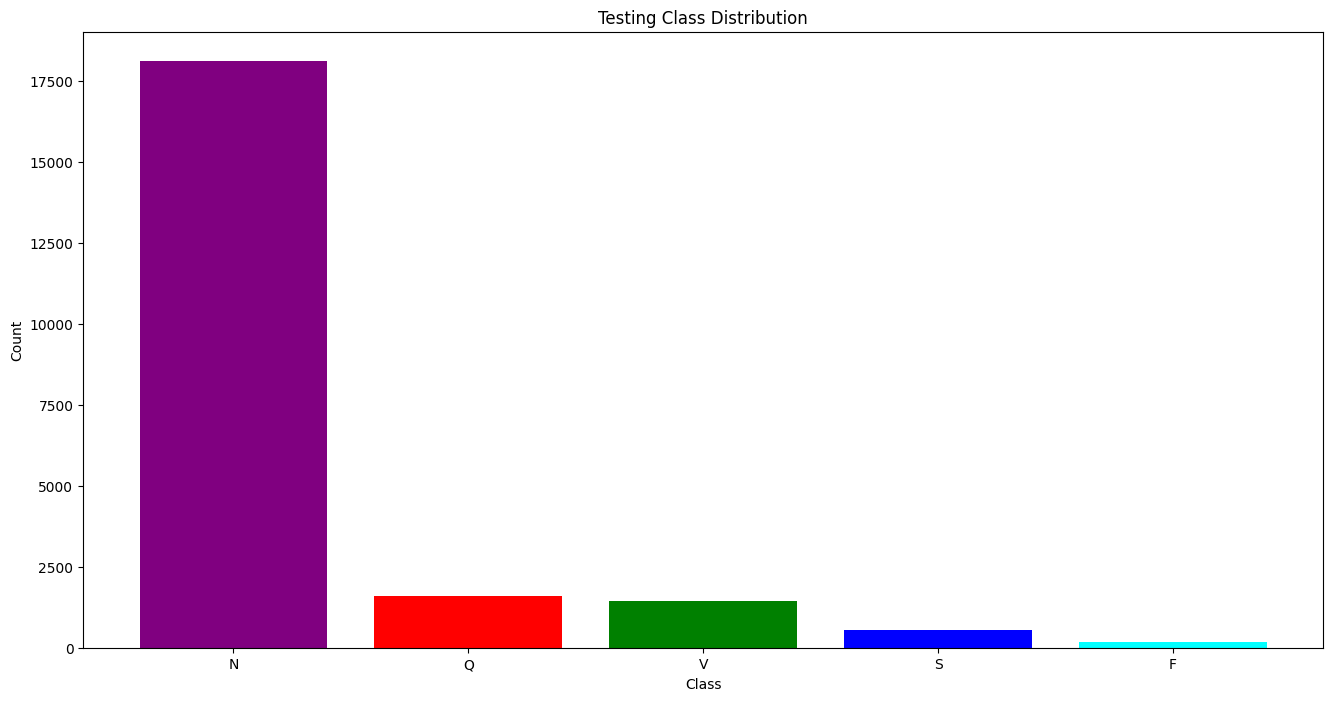

In [37]:
plt.figure(figsize=(16, 8))
plt.bar([LABELS[label] for label in testing_label_counts.index.values], testing_label_counts.values, 
        color=['purple', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Testing Class Distribution')
plt.show()

<h2>Signal Visualization</h2>

In [38]:
SAMPLE_FREQ = 125

In [39]:
time_duration = np.arange(df_mitbih_train.shape[1] - 1)/SAMPLE_FREQ

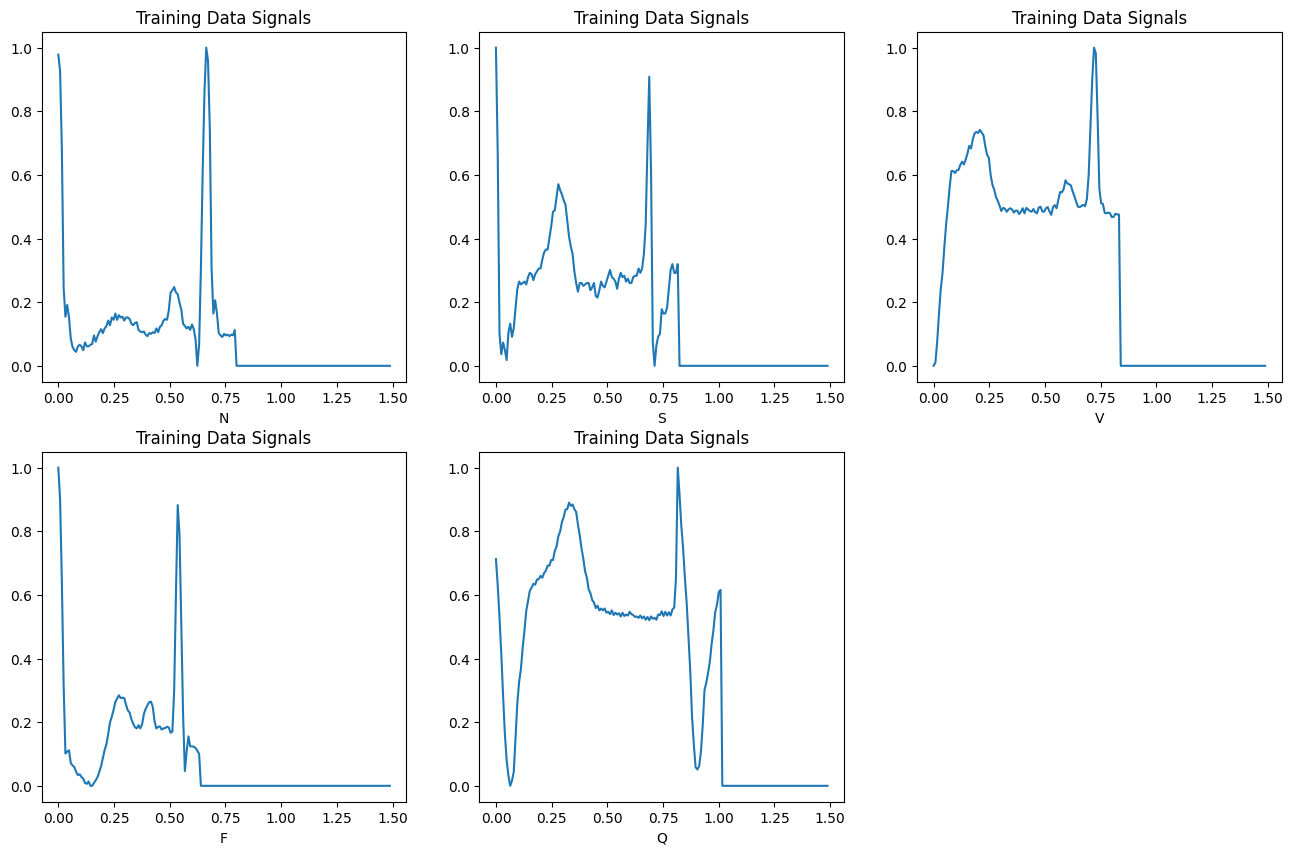

In [40]:
plt.figure(figsize=(16, 10))
for label in df_mitbih_train.labels.unique():
    plt.subplot(2,3,label+1)
    plt.xlabel(LABELS[label])
    plt.title('Training Data Signals')
    plt.plot(time_duration, df_mitbih_train.loc[df_mitbih_train.labels==label].
             values[0,:df_mitbih_train.shape[1] - 1])

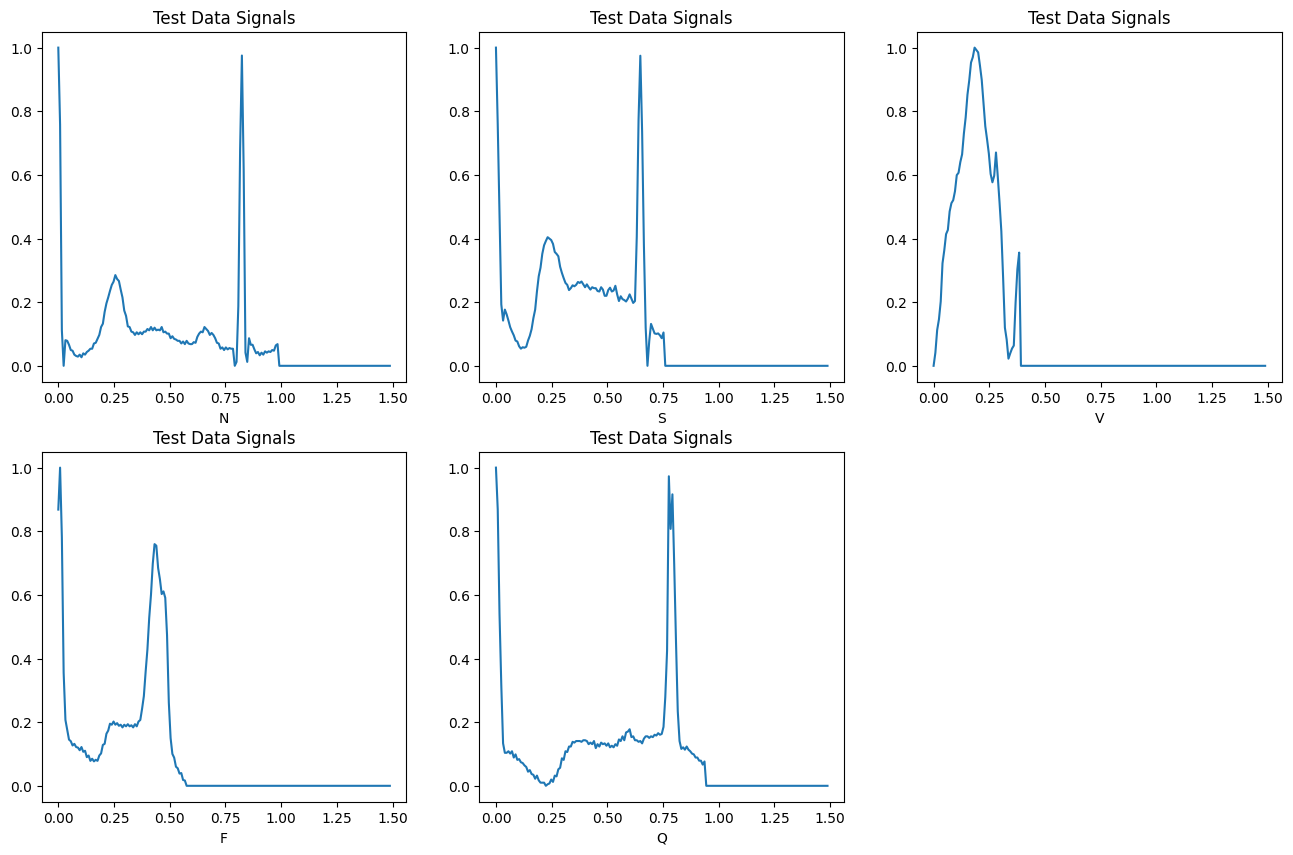

In [42]:
plt.figure(figsize=(16, 10))
for label in df_mitbih_test.labels.unique():
    plt.subplot(2,3,label+1)
    plt.xlabel(LABELS[label])
    plt.title('Test Data Signals')
    plt.plot(time_duration, df_mitbih_test.loc[df_mitbih_test.labels==label].
             values[0,:df_mitbih_test.shape[1] - 1])

<h2>Missing Data</h2>

In [45]:
#checking for null values
print('Number of instances of missing data in training set: ', df_mitbih_train.isnull().sum().sum())
print('Number of instances of missing data in test set: ', df_mitbih_test.isnull().sum().sum())

Number of instances of missing data in training set:  0
Number of instances of missing data in test set:  0


In [48]:
#checking for empty rows
print('Number of empty rows/samples in training set: ', df_mitbih_train[df_mitbih_train.sum(axis=1)==0])
print('Number of empty rows/samples in test set: ', df_mitbih_test[df_mitbih_test.sum(axis=1)==0])

Number of empty rows/samples in training set:  Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 188 columns]
Number of empty rows/samples in test set:  Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 188 columns]
